<a href="https://colab.research.google.com/github/yec3168/DAP__/blob/main/Project_201812033_%EC%97%B0%EC%9D%91%EC%B0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix 데이터 분석**

                                                                          201812033 연응찬 
이번에 제가 조사할 데이터는 Netflix 데이터로 평소에 여가시간으로 영화나 드라마 등 여러 프로그램을 시청을 하는데, Netflix에서 방영하는 프로그램들을 분류하고  수업에서 사용했던 **시각화하는 방법을 이용하여 보여주는 것을 목표로 하고** 진행하겠습니다.



## **Kaggle에서 Datasheet 불러오기**



▶**Kaggle** 데이터 시트를 구글 **Colab**에 불러와 사용할수 있도록 하기 위해서는  필수적인 작업이 있다.

 아래 작업이 kaggle에 데이터시트를 가져와서 사용하는 방법이다. 

 먼저, Kaggle에 들어가 로그인을 하고, 메뉴에서 Account에 들어가 Create New API Token을 눌러 Kaggle.json파일을 다운받는다.
 
 그리고 Colab에 아래코드를 복사해 붙여놓고 파일선택으로 아까 다운받은 Kaggle.json파일을 선택한다.

In [2]:
#@title 기본 제목 텍스트
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeonec","key":"c3d16950a73eda7d5d808e6cf6495598"}'}

아래 코드는 아까 넣은 파일이 제대로 업로드 되었는지 확인하는 것이다.

In [3]:
ls -1ha kaggle.json

kaggle.json


아래 작업은 Kaggle API 를 사용하기 위해서 json 파일을 ~/.kaggle로 이동 시키는 작업이다.

In [4]:
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

내가 사용할 데이터시트를 사용하기 위한 작업이다.

In [6]:
!kaggle datasets download -d shivamb/netflix-shows

!ls

401 - Unauthorized
kaggle.json  netflix_titles.csv.zip  sample_data


In [7]:
!unzip netflix_titles.csv.zip

Archive:  netflix_titles.csv.zip
  inflating: netflix_titles.csv      


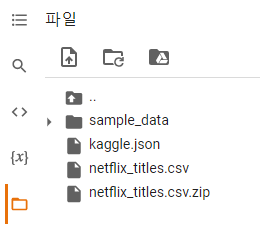

위에 작업을 완료하면 사진처럼 파일이 생긴다.

# 데이터 읽기




In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
netflix_Data = pd.read_csv('./netflix_titles.csv')

netflix_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
netflix_Data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

discription은 말 그대로 영화나 Tv Show에 설명 부분이고, Cast는 NaN값이 많고, 분석으로 적당하지 않으므로 제외해도 상관없으니 제외한다. listed_in도 마찬가지.


In [11]:
netflix_Data = netflix_Data.drop(columns=['description', 'cast','director', 'listed_in'], axis=1)
netflix_Data.head(99)

,show_id,type,title,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...
94,s95,Movie,Show Dogs,"United Kingdom, United States","September 8, 2021",2018,PG,90 min
95,s96,TV Show,The Circle,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,United States,"September 7, 2021",2018,TV-MA,97 min
97,s98,TV Show,Kid Cosmic,United States,"September 7, 2021",2021,TV-Y7,2 Seasons


# Tv show와 Movie의 수

넷플릭스에서 우리가 시청하고 있는 콘텐츠 중 Tv Show와 Movie의 수를 확인.

In [12]:
movie = netflix_Data[netflix_Data['type'] == 'Movie']
movie.count()

show_id         6131
type            6131
title           6131
country         5691
date_added      6131
release_year    6131
rating          6129
duration        6128
dtype: int64

In [17]:
tv_show = netflix_Data[netflix_Data['type'] == 'TV Show']
tv_show.count()

show_id         2676
type            2676
title           2676
country         2285
date_added      2666
release_year    2676
rating          2674
duration        2676
dtype: int64

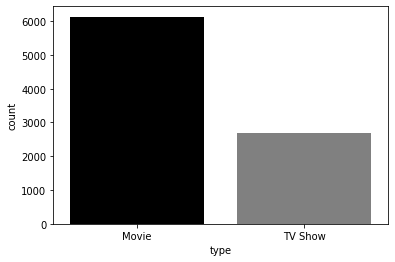

In [14]:
sns.countplot(data=netflix_Data, x='type', palette=['black', 'gray'])

['PG-13' 'PG' 'TV-MA' ... 'R' 'PG' 'TV-14']
['TV-MA' 'TV-MA' 'TV-MA' ... 'TV-Y7' 'TV-PG' 'TV-Y7']


Text(0.5, 1.0, 'Tv Show')

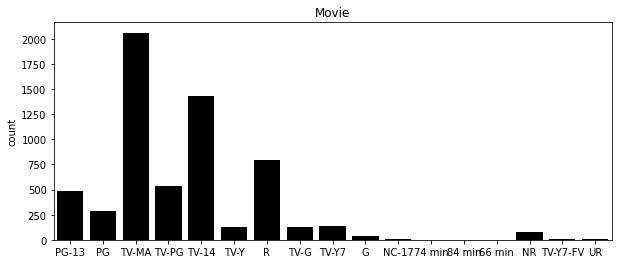

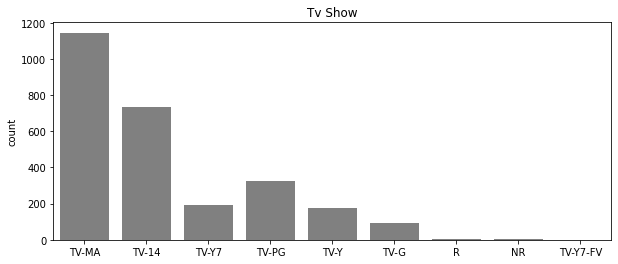

In [16]:
rating_movie = movie['rating'].to_numpy()
print(rating_movie)

rating_tvshow = tv_show['rating'].to_numpy()
print(rating_tvshow)

plt.figure(figsize=(10, 4))
sns.countplot(data = movie, x = rating_movie, color='black')
plt.title("Movie")

plt.figure(figsize=(10, 4))
sns.countplot(data = tv_show, x = rating_tvshow, color='gray')
plt.title("Tv Show")